## Plot Results of Solving Ising Model using Real Space Renormalizaton Group

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
def mean_field_energy_density(lmbda):
    if np.abs(lmbda) <= 2:
        return -1 - lmbda ** 2 / 4
    return -np.abs(lmbda)

In [23]:
compiled_dir = f"..{os.sep}compiled"
plot_dir = f"..{os.sep}plots"

In [24]:
program = f"{compiled_dir}{os.sep}rsrg_ising"

In [25]:
N = list(range(2, 6))

In [26]:
lam = np.arange(-5, 5.1, 0.1)

In [27]:
gs_energy = np.zeros((len(N), len(lam)))
gs_energy[:] = np.nan

In [28]:
max_iterations = np.zeros((len(N), len(lam)))
max_iterations[:] = np.nan

In [29]:
for i in range(len(N)):
    print(f"Running N = {N[i]} ...")
    for j in range(len(lam)):
        output = subprocess.run(
            [program, "--N", str(N[i]), "--lambda", str(lam[j])],
            stdout=subprocess.PIPE,
            encoding="ascii"
        )

        results = output.stdout.split("\n")

        did_converge = results[8].split("=")[1].strip()

        if did_converge == "T":
            gs_energy[i, j] = float(results[6].split("=")[1])
            max_iterations[i, j] = int(results[7].split("=")[1])

Running N = 2 ...
Running N = 3 ...
Running N = 4 ...
Running N = 5 ...


In [30]:
max_iterations[0]

array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       16., 16., 16., 16., 17., 18., 22., 30., 31., 31., 32., 32., 32.,
       32., 32., 32., 32., 33., 33., 33., 33., 33., 33., 33., 33., 33.,
       33., 33., 33., 33., 33., 33., 32., 32., 32., 32., 32., 32., 32.,
       31., 31., 30., 22., 18., 17., 16., 16., 16., 16., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14.])

In [38]:
max_iterations[0].mean()

20.980198019801982

In [31]:
gs_energy[0]

array([-5.0417, -4.9426, -4.8435, -4.7445, -4.6455, -4.5465, -4.4476,
       -4.3488, -4.25  , -4.1513, -4.0526, -3.954 , -3.8555, -3.7571,
       -3.6588, -3.5605, -3.4624, -3.3644, -3.2666, -3.1688, -3.0713,
       -2.9739, -2.8768, -2.7799, -2.6832, -2.5869, -2.4909, -2.3953,
       -2.3002, -2.2057, -2.1118, -2.0188, -1.9269, -1.8366, -1.7486,
       -1.6636, -1.5822, -1.5047, -1.431 , -1.3644, -1.3028, -1.2466,
       -1.1957, -1.1505, -1.111 , -1.0774, -1.0496, -1.028 , -1.0125,
       -1.0031, -1.    , -1.0031, -1.0125, -1.028 , -1.0496, -1.0774,
       -1.111 , -1.1505, -1.1957, -1.2466, -1.3028, -1.3644, -1.431 ,
       -1.5047, -1.5822, -1.6636, -1.7486, -1.8366, -1.9269, -2.0188,
       -2.1118, -2.2057, -2.3002, -2.3953, -2.4909, -2.5869, -2.6832,
       -2.7799, -2.8768, -2.9739, -3.0713, -3.1688, -3.2666, -3.3644,
       -3.4624, -3.5605, -3.6588, -3.7571, -3.8555, -3.954 , -4.0526,
       -4.1513, -4.25  , -4.3488, -4.4476, -4.5465, -4.6455, -4.7445,
       -4.8435, -4.9

In [32]:
mf_gs_energy = [mean_field_energy_density(l) for l in lam]

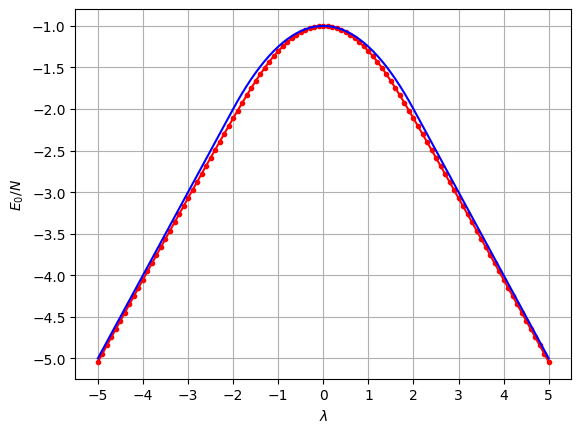

In [33]:
plt.plot(lam, gs_energy[0], "r.-", label="RSRG")
plt.plot(lam, mf_gs_energy, "b-", label="MF")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xticks(np.arange(-5, 6, 1))
#plt.legend()
plt.grid()
plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda.pdf", format="pdf", bbox_inches="tight")

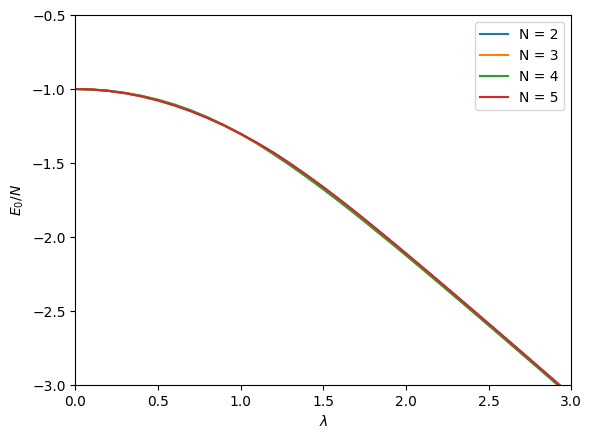

In [34]:
plt.plot(lam, gs_energy[0], label="N = 2")
plt.plot(lam, gs_energy[1], label="N = 3")
plt.plot(lam, gs_energy[2], label="N = 4")
plt.plot(lam, gs_energy[0], label="N = 5")
plt.xlabel("$\lambda$")
plt.ylabel("$E_0/N$")
plt.xlim([0, 3])
plt.ylim([-3, -0.5])
plt.legend()
plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda_different_N.pdf", format="pdf", bbox_inches="tight")

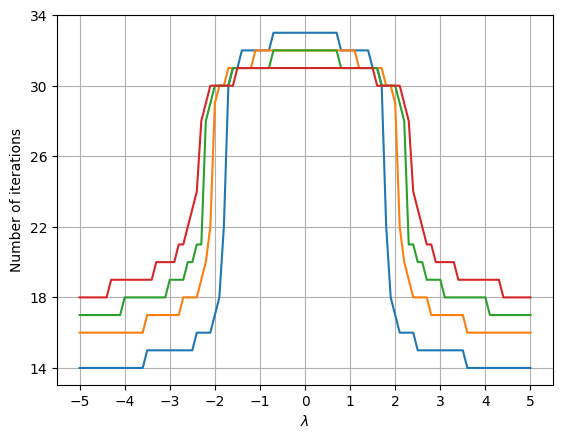

In [36]:
plt.plot(lam, max_iterations[0], label="N = 2")
plt.plot(lam, max_iterations[1], label="N = 3")
plt.plot(lam, max_iterations[2], label="N = 4")
plt.plot(lam, max_iterations[3], label="N = 5")
# plt.legend()
plt.grid()
plt.xlabel("$\lambda$")
plt.ylabel("Number of iterations")
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(range(14, 36, 4))
plt.savefig(f"{plot_dir}{os.sep}max_iterations_vs_lambda.pdf", format="pdf", bbox_inches="tight")